In [1]:
import numpy as np
import matplotlib.pyplot as plt



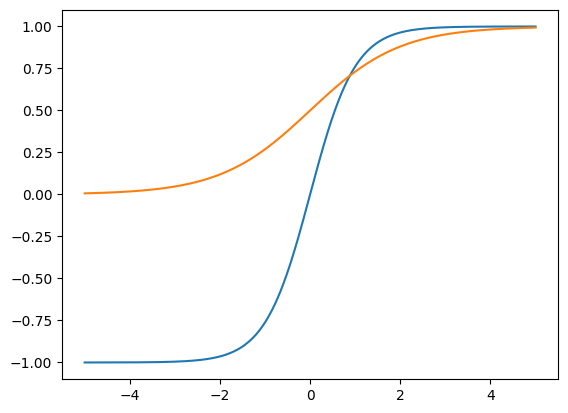

In [11]:
x = np.linspace(-5, 5, 1000)
y = np.tanh(x)
z = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.plot(x, z)
